In [21]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from matplotlib.animation import FuncAnimation, FFMpegWriter
from matplotlib import rc
from matplotlib.colors import LinearSegmentedColormap as colormap
from IPython.display import HTML
import functions as f
import os, sys
sys.path.append(os.path.relpath("./src"))
from kitaev_chain import kitaev_chain_model, quench_simulation_bdg, quench_simulation_tfim
from utils import to_n, sz, power_set

rc('animation', ffmpeg_path='C:\\Program Files (x86)\\ffmpeg\\bin\\ffmpeg.exe')
fps = 3
FFwriter=FFMpegWriter(fps=fps, extra_args=['-vcodec', 'libx264'])

In [22]:
H0 = kitaev_chain_model(8, 0, 1., 1.)
H = kitaev_chain_model(8, 1, 1., 1.)

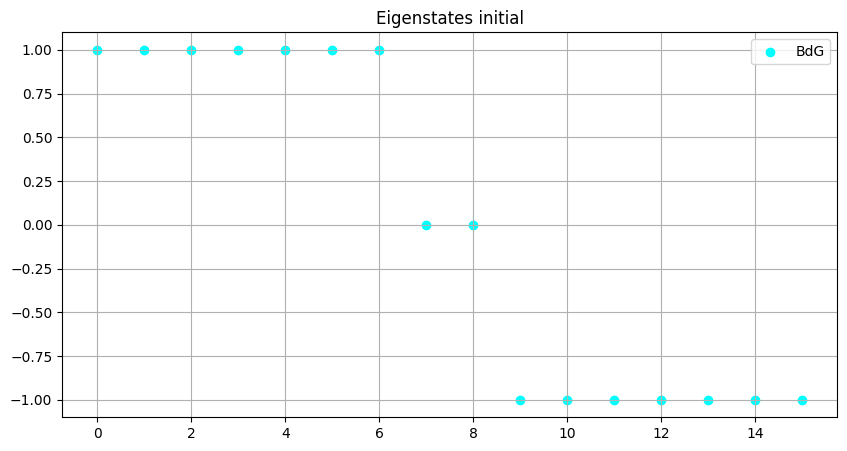

In [31]:
simBdg = quench_simulation_bdg(H0, H)
plt.figure(1, (10, 5))
plt.title("Eigenstates initial")
plt.grid()
plt.scatter(np.arange(len(simBdg.evals0)), simBdg.evals0, c='cyan', label="BdG")
plt.legend()
#simBdg.fill_sim(0.1, 20)
#simBdg.save_animation("test bdg")

In [28]:
simTfim = quench_simulation_tfim(H0, H)
#simTfim.plot_initial_zero_eigenstates()
#simTfim.fill_sim(0.1, 5)
#simTfim.save_animation("test tfim")

In [29]:
bdgSubsetEvals = [np.dot(np.array(s), simBdg.evals0[:8]) for s in power_set(8)]
bdgSubsetEvals = np.array(sorted(bdgSubsetEvals, reverse=True))

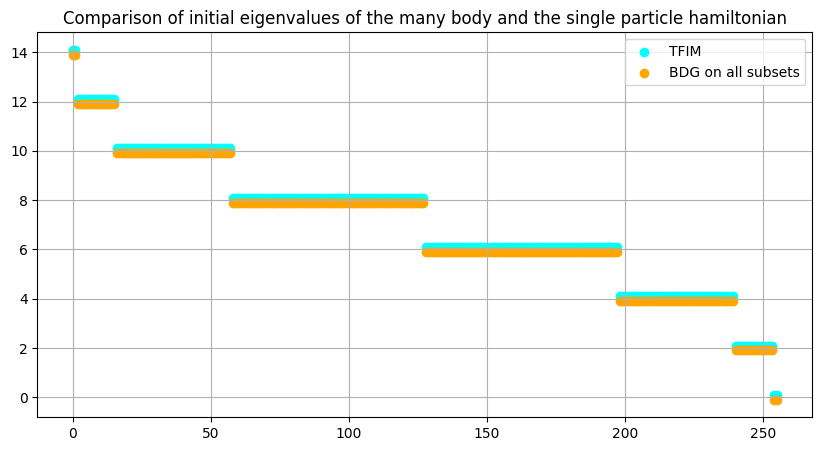

In [30]:
plt.figure(1, (10, 5))
plt.title("Comparison of initial eigenvalues of the many body and the single particle hamiltonian")
plt.grid()
plt.scatter(np.arange(len(simTfim.evals0)), simTfim.evals0 - min(simTfim.evals0) + .1, c='cyan', label="TFIM")
plt.scatter(np.arange(len(bdgSubsetEvals)), bdgSubsetEvals * 2 -.1, c='orange', label="BDG on all subsets")
plt.legend()

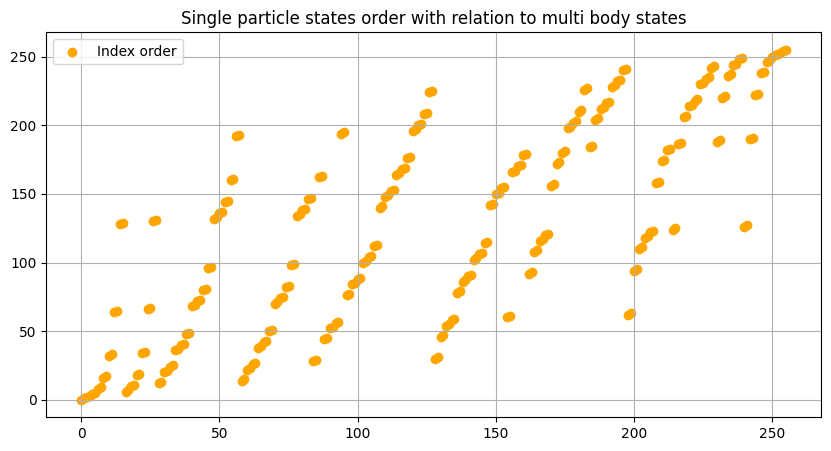

In [20]:
bdgSubsetEvals = [np.dot(np.array(s), simBdg.evals0[:8]) for s in power_set(8)]
bdgSubsetEvals = list(zip(bdgSubsetEvals, range(len(bdgSubsetEvals))))
bdgSubsetEvalsSorted = sorted(bdgSubsetEvals, key=lambda p: p[0])

plt.figure(1, (10, 5))
plt.title("Single particle states order with relation to multi body states")
plt.grid()
plt.scatter(np.arange(len(bdgSubsetEvals)), [x[1] for x in bdgSubsetEvalsSorted], c='orange', label="Index order")
plt.legend()

In [ ]:
results = []
for x in np.linspace(0,10,40):
    H0 = kitaev_chain_model(6, x, 1., 1.)
    sim = quench_simulation_tfim(H0, H0)
    results.append(np.real(sim.evals0))

fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches(20, 20)
for row in np.array(results).T:
    ax1.plot(row)

In [ ]:
plt.plot(sim.evals0)

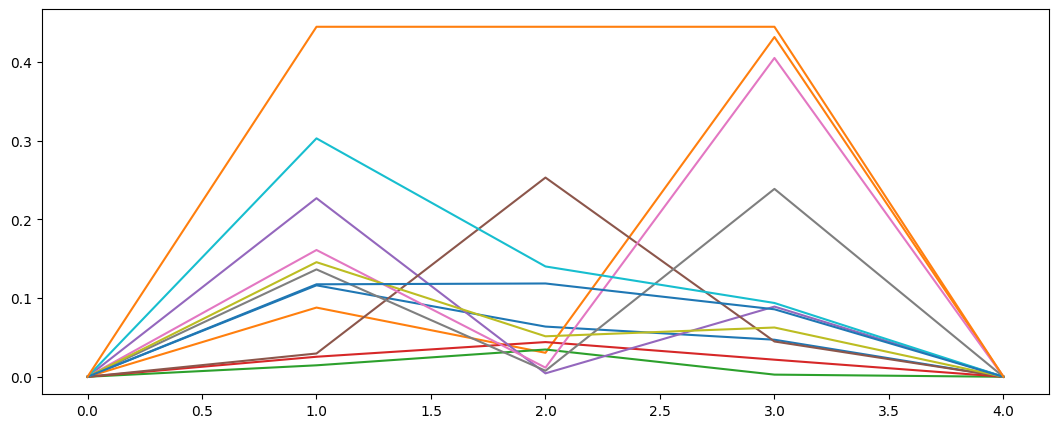

In [43]:
fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches(13, 5)
eigenpairs = list(filter(lambda pair: pair[0] ** 2 < 1e-5, zip(sim.evals0, sim.evecs0)))
for pair in eigenpairs:
    ax1.plot(to_exp_values(5, pair[1]))